# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


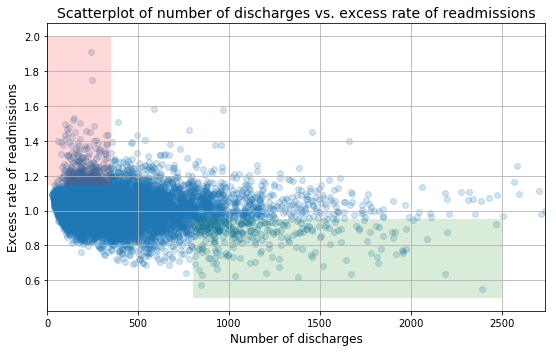

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### A. Do you agree with the above analysis and recommendations? Why or why not?
While it does seem resonable to conclude that there is a correlation between the two variables, the degree of uncertainty in the chart seems to cast resonable doubt that the correlation is strong enough to support the reccommendataions of the anaylsis. After computing the correlation, calculating the pearson coefficient over and over again with permutations of the paired data would help measure the degree of confidence in the observed correlation (or lack thereof).
### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:
#### 1. Setup an appropriate hypothesis test. 
As mentioned above, the pearson coefficient of the correlation must be caluclated to support the reccommendations based on the percieved correlation. 

In [5]:
#computes the pearson correlation between two arrays
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0,1]



In [6]:
#THESE NEED TO HAVE NULLS AND ZEROS REMOVED
discharges = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges'] != 0]
readmit = clean_hospital_read_df.loc[clean_hospital_read_df['Excess Readmission Ratio'].notnull()]

In [7]:
# Compute observed correlation: r_obs
r_obs = pearson_r(discharges['Number of Discharges'], readmit['Excess Readmission Ratio'])
print('pearson correlation coefficient: ' + str(r_obs))

pearson correlation coefficient: -0.0973979435108


#### 2. Compute and report the observed significance value (or p-value)
The observed correlation is quite weak. According to this, there is a -0.1 linear relationship between the two variables. Let us test this by proposing our null hypothesis: that there is that there is no correlation between readmission rate and number of discharges, and the test statistic will be the pearson correlation. 

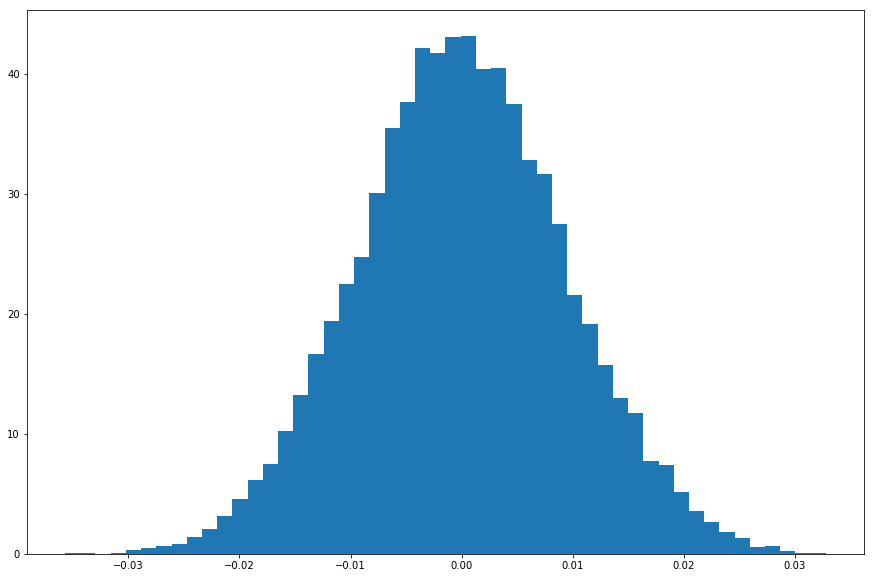

p-value: 0


In [8]:
%matplotlib inline
plt.figure(figsize=(15,10))

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute measurments: illiteracy_permuted
    readmit_permuted = np.random.permutation(readmit['Excess Readmission Ratio'])

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(discharges['Number of Discharges'], readmit_permuted)

plt.hist(perm_replicates, bins=50, normed=True)
plt.show()

# Compute p-value: p
p = (np.sum(perm_replicates <= r_obs) + np.sum(perm_replicates >= (r_obs * -1)))/ len(perm_replicates)
print('p-value: ' + str(p))

#### 3. Report statistical significance for  αα  = .01
Our test's p-value is approaching zero. From this test we can say with confidence that the observed correlation, -0.1, is indeed statistically significant.

#### 4. Discuss statistical significance and practical significance
##### Do they differ here? 
While we can say that the correlation itself was statistically significant, that adds little weight to meaning of the actual value of the correlation, which was -0.1. This falls short of even a weak negative correlation generally considered to be -0.3, meaning that the calculated correlation has little practical significance. 
##### How does this change your recommendation to the client?
Based on this information, the reccommendations made by the previous analysis hold little water and likely would not effect positive change for readmissions. Continued analysis of other factors contributing to readmission rate must be conducted to make furtger reccommendations. 

#### 5. Look at the scatterplot above.
##### What are the advantages and disadvantages of using this plot to convey information?
While this plot has the advantage of showing as much of the data as possible at one time, it is very difficult to estimate the distribution of the data, and the overwhelming amount of datapoints confuses any attempts to draw reasonable conclusions from the plot (as evidenced by the previous analysis).

##### Construct another plot that conveys the same information in a more direct manner

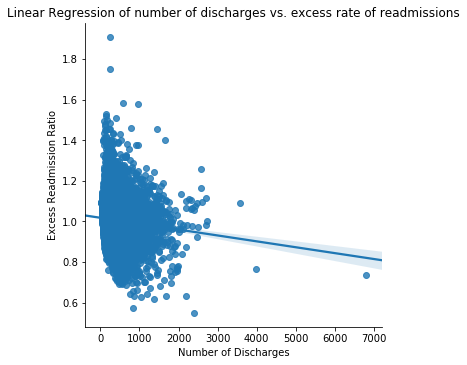

In [37]:

# Plot a linear regression
_ = sns.lmplot(x='Number of Discharges', y='Excess Readmission Ratio', data=clean_hospital_read_df)

# Display the plot
_ = plt.title('Linear Regression of number of discharges vs. excess rate of readmissions')
_ = plt.figure(figsize=(15,10))

plt.show()